In [1]:
%pylab inline
import pypropep as ppp
import pprint
ppp.init()


Bad key "axes.color_cycle" on line 240 in
/Users/jonny/Library/Mobile Documents/com~apple~CloudDocs/Documents/YHayPi/aa103/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Populating the interactive namespace from numpy and matplotlib
Loaded 1921 thermo species
Loaded 1031 propellants


In [22]:
h2 = ppp.PROPELLANTS['HYDROGEN (GASEOUS)']
o2 = ppp.PROPELLANTS['OXYGEN (GAS)']
fe = ppp.FrozenPerformance()
fe.add_propellants([(h2, 1.0), (o2, 0.5)])
fe.set_state(30, Pe=1.)

print 'Flame temperature: %.1f K' % (fe.properties[0].T)
print 'C*: %.1f m/s' % (fe.performance.cstar)
print 'C: %.1f m/s' % (fe.performance.Isp)
print 'Composition:'
pprint.pprint(fe.composition['chamber'])

Flame temperature: 3557.4 K
C*: 2125.0 m/s
C: 3131.8 m/s
Composition:
[(u'H2O', 0.6593937471607763),
 (u'H2', 0.1308072873783619),
 (u'OH', 0.10528479151704373),
 (u'H', 0.04408734906091126),
 (u'O2', 0.03969480964143839),
 (u'O', 0.02053295250039767),
 (u'HO2', 0.00017312657060967372),
 (u'H2O2', 2.5752225445990198e-05),
 (u'O3', 1.8419818397370108e-07)]


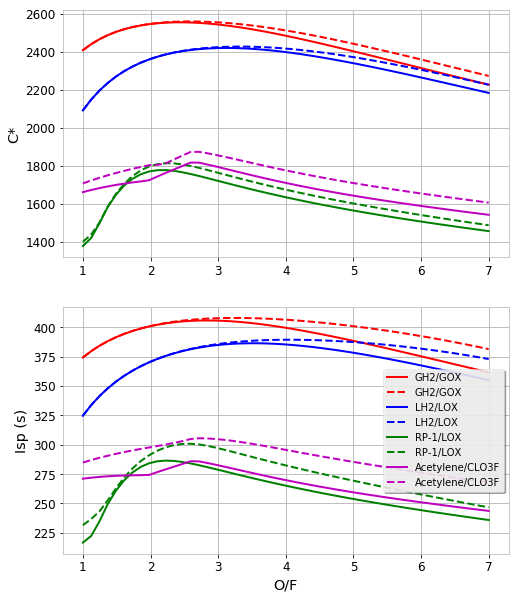

In [8]:
propellants = [(ppp.PROPELLANTS['HYDROGEN (GASEOUS)'], ppp.PROPELLANTS['OXYGEN (GAS)'], 'GH2/GOX', 'r'),
               (ppp.PROPELLANTS['HYDROGEN (CRYOGENIC)'], ppp.PROPELLANTS['OXYGEN (LIQUID)'], 'LH2/LOX', 'b'),
               (ppp.PROPELLANTS['RP-1 (RPL)'], ppp.PROPELLANTS['OXYGEN (LIQUID)'], 'RP-1/LOX', 'g'),
               (ppp.PROPELLANTS['ACETYLENE (LIQUID)'], ppp.PROPELLANTS['PERCHLORYL FLUORIDE (CLO3F)'], 
                'Acetylene/CLO3F', 'm')]
plt.figure(figsize=(8,10))
for pro in propellants:
    OF = np.linspace(1, 7)
    m_fuel = 1.0
    cstar_fr = []
    cstar_sh = []
    Isp_fr = []
    Isp_sh = []
    for i in xrange(len(OF)):
        p = ppp.FrozenPerformance()
        psh = ppp.ShiftingPerformance()

        m_ox = OF[i]

        p.add_propellants_by_mass([(pro[0], m_fuel), (pro[1], m_ox)])
        psh.add_propellants_by_mass([(pro[0], m_fuel), (pro[1], m_ox)])

        p.set_state(P=1000./14.7, Pe=1)
        psh.set_state(P=1000./14.7, Pe=1)

        cstar_fr.append(p.performance.cstar)
        Isp_fr.append(p.performance.Isp/9.8)

        cstar_sh.append(psh.performance.cstar)
        Isp_sh.append(psh.performance.Isp/9.8)

    ax = plt.subplot(211)
    ax.plot(OF, cstar_fr, c=pro[3], label=pro[2])
    ax.plot(OF, cstar_sh, '--', c=pro[3], label=pro[2])
    ax.set_ylabel('C*')
    ax1 = plt.subplot(212, sharex=ax)
    ax1.plot(OF, Isp_fr,  c=pro[3], label=pro[2])
    ax1.plot(OF, Isp_sh, '--', c=pro[3], label=pro[2])
    ax1.set_ylabel('Isp (s)')
    plt.xlabel('O/F')
plt.legend(loc='best')